# Dimension Reduction - Principal Component Analysis (PCA)
Principal Component Analysis (PCA) was performed to reduce the number of dimensions to reduce model runtime while retaining the most explained varaince. For this analysis, the threshold was set to 95%, meaning the selected principal components would explain 95% of the variance in data.

## Import Depdendencies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1) `Aisle` Dataset (original product categories)

In [2]:
cust_train_rescale = pd.read_csv('../Outputs/cust_train_aisle_rescale.csv')
cust_train_rescale.drop(cust_train_rescale.columns[0], axis=1, inplace=True)

print(f'There are {len(cust_train_rescale):,} customers in training data set')
cust_train_rescale.head(5)

There are 20,168 customers in training data set


,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Total
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.250,0.0,0.200000,0.073394
1,0.0,0.5,0.0,0.0,0.0,1.0,0.00,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,-0.250,0.0,-0.333333,-0.495413
2,0.0,4.0,0.0,3.0,126.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,-0.250,0.0,1.800000,2.385321
3,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,...,3.5,0.0,0.5,0.0,0.0,0.0,0.500,0.0,-0.200000,-0.119266
4,0.0,0.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.5,0.0,1.0,0.0,1.0,0.0,0.875,0.0,-0.400000,-0.481651


In [3]:
# convert to np array for PCA
cust_train_rescale = cust_train_rescale.values

#### Plot variance by number of principal components
95% of the variance can be explained by less than 80 `aisle`/product categories

In [4]:
def plotPCAvariance(data, n_components):
    ''' Plot cumulative variance by number of principal components'''
    
    model = PCA().fit(data)

    plt.figure()
    plt.rcParams["figure.figsize"] = (10,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, n_components + 1, step=1)
    y = np.cumsum(model.explained_variance_ratio_)*100

    plt.ylim(0.0,110)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Principal Components')
    plt.xticks(np.arange(0, n_components + 10, step=10))
    plt.ylabel('Cumulative variance (%)')
    plt.title('Number of components needed to explain variance')

    plt.axhline(y=95, color='r', linestyle='-')
    plt.text(0.5, 85, '95% threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

<Figure size 432x288 with 0 Axes>

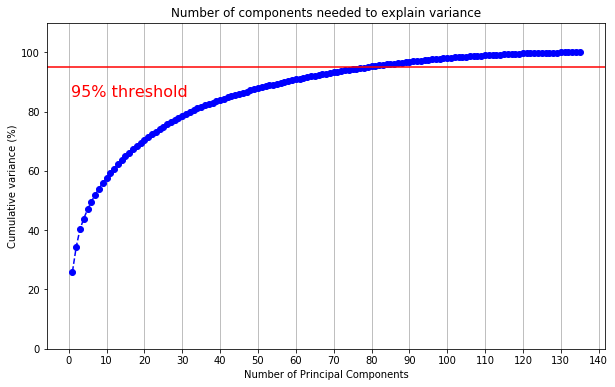

In [5]:
# 'aisle' data set
plotPCAvariance(cust_train_rescale, cust_train_rescale.shape[1])

In [6]:
cust_train_reduced = PCA(n_components = 0.95).fit_transform(cust_train_rescale)
print(f'Number of components was reduced to {cust_train_reduced.shape[1]}')

Number of components was reduced to 79


#### Export reduced dataset to csv

In [7]:
pd.DataFrame(cust_train_reduced).to_csv('../Outputs/cust_train_aisle_reduced.csv')

## 2) `Aisle2` Dataset (added organic product categories)

In [8]:
cust_train_rescale2 = pd.read_csv('../Outputs/cust_train_aisle_rescale2.csv')
cust_train_rescale2.drop(cust_train_rescale2.columns[0], axis=1, inplace=True)

print(f'There are {len(cust_train_rescale2):,} customers in training data set')
cust_train_rescale2.head(5)

There are 20,168 customers in training data set


,Organic air fresheners candles,Organic asian foods,Organic baby bath body care,Organic baby food formula,Organic bakery desserts,Organic baking ingredients,Organic baking supplies decor,Organic beauty,Organic beers coolers,Organic body lotions soap,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.250,0.0,0.363636,0.073394
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,-0.250,0.0,-0.272727,-0.495413
2,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.250,0.0,2.636364,2.385321
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.500,0.0,-0.181818,-0.119266
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.875,0.0,-0.363636,-0.481651


In [9]:
# convert to np array for PCA
cust_train_rescale2 = cust_train_rescale2.values

#### Plot variance by number of principal components
95% of the variance can be explained by less than 80 `aisle`/product categories

<Figure size 720x432 with 0 Axes>

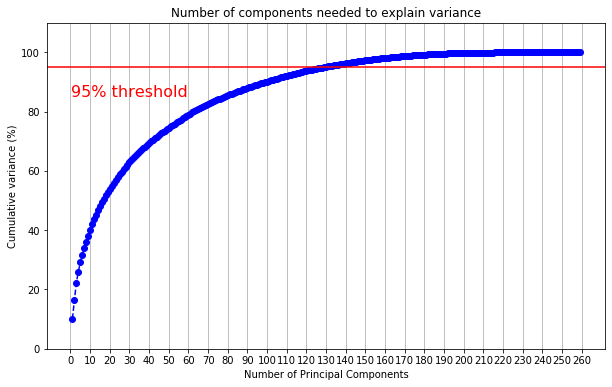

In [10]:
# 'aisle2' data set
plotPCAvariance(cust_train_rescale2, cust_train_rescale2.shape[1])

In [11]:
cust_train_reduced2 = PCA(n_components = 0.95).fit_transform(cust_train_rescale2)
print(f'Number of components was reduced to {cust_train_reduced2.shape[1]}')

Number of components was reduced to 130


#### Export reduced dataset to csv

In [12]:
pd.DataFrame(cust_train_reduced2).to_csv('../Outputs/cust_train_aisle_reduced2.csv')